<a href="https://colab.research.google.com/github/NishchayJindal/Assignment-3-/blob/main/Topsis_for_prtrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Define Pretrained Models and Evaluation Criteria
models = ['GPT-2', 'GPT-2 Medium', 'GPT-2 Large', 'GPT-NEO', 'T5']
criteria = ['Coherence', 'Fluency', 'Relevance', 'Perplexity']  # Lower perplexity is better

In [6]:
# Step 2: Assign Hypothetical Evaluation Scores
# Higher is better for Coherence, Fluency, Relevance; Lower is better for Perplexity
scores = np.array([
    [8, 9, 7, 20],    # GPT-2
    [9, 8, 8, 18],    # GPT-2 Medium
    [9, 9, 9, 15],    # GPT-2 Large
    [8, 8, 7, 17],    # GPT-NEO
    [7, 9, 8, 16]     # T5
])


In [7]:
# Step 3: Normalize the Scores
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores)

# Adjust for Perplexity (lower is better)
normalized_scores[:, 3] = scaler.fit_transform(scores[:, 3].reshape(-1, 1)).flatten()
normalized_scores[:, 3] = 1 - normalized_scores[:, 3]

In [8]:
# Step 4: Calculate Ideal Best and Worst
ideal_best = np.max(normalized_scores, axis=0)
ideal_worst = np.min(normalized_scores, axis=0)

In [9]:
# Step 5: Calculate Distance to Ideal Best and Worst
dist_best = np.linalg.norm(normalized_scores - ideal_best, axis=1)
dist_worst = np.linalg.norm(normalized_scores - ideal_worst, axis=1)

In [10]:
# Step 6: Calculate TOPSIS Scores and Rank

# Calculate the TOPSIS score
topsis_scores = dist_worst / (dist_best + dist_worst)
rankings = topsis_scores.argsort()[::-1]  # Higher score = better rank

In [11]:
# Step 7: Display Results
results = pd.DataFrame({
    'Model': models,
    'Coherence': scores[:, 0],
    'Fluency': scores[:, 1],
    'Relevance': scores[:, 2],
    'Perplexity': scores[:, 3],
    'TOPSIS Score': topsis_scores,
    'Rank': rankings.argsort() + 1
})

print(results.sort_values(by='TOPSIS Score', ascending=False))

          Model  Coherence  Fluency  Relevance  Perplexity  TOPSIS Score  Rank
2   GPT-2 Large          9        9          9          15      1.000000     1
4            T5          7        9          8          16      0.547597     2
1  GPT-2 Medium          9        8          8          18      0.483426     3
0         GPT-2          8        9          7          20      0.427051     4
3       GPT-NEO          8        8          7          17      0.334709     5


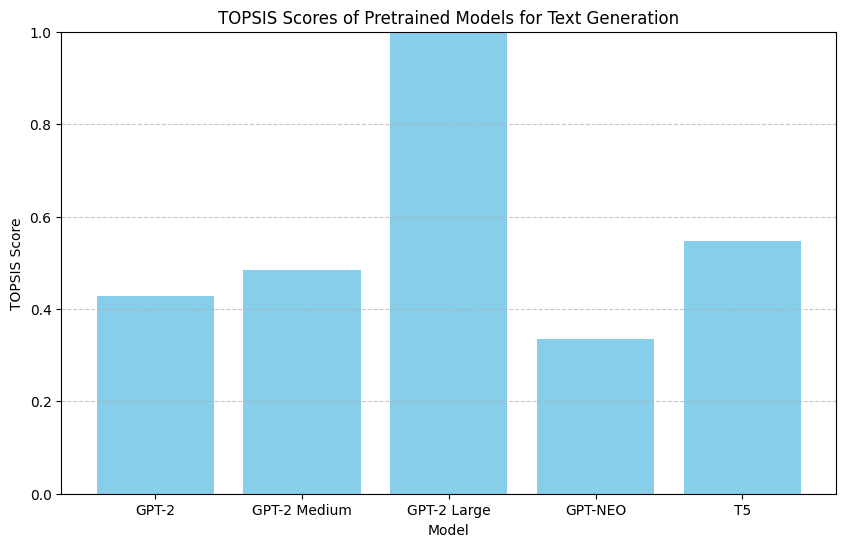

In [12]:
# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['TOPSIS Score'], color='skyblue')
plt.title('TOPSIS Scores of Pretrained Models for Text Generation')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


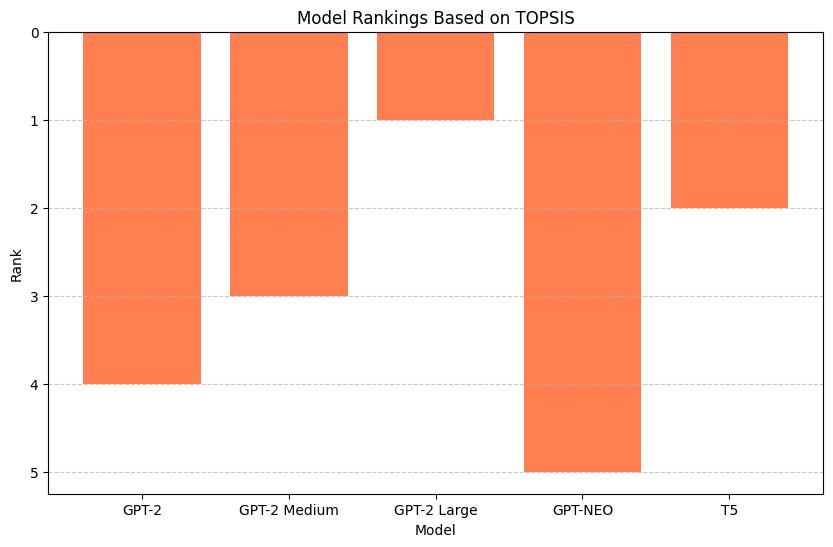

In [13]:
# Visualizing Rankings
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Rank'], color='coral')
plt.title('Model Rankings Based on TOPSIS')
plt.xlabel('Model')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # Invert y-axis to show Rank 1 at the top
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()